In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()

# Correlation between junction coverage and unimodality

In this section we analyze the relationship between splicing junction read coverage and $\Psi$ observations in several datasets. We found that in all datasets, exons with higher average read coverage also tend to show intermediate (not 0 or 1) $\Psi$ values. This was observed in all datasets, although the proportion of unimodal exons is clearly higher in some datasets, than in others.

In [3]:
if not os.path.exists('plots2'):
    os.makedirs('plots2')
    
    
if not os.path.exists('plots2/figure1'):
    os.makedirs('plots2/figure1')
    os.makedirs('plots2/figure2')
    os.makedirs('plots2/figure3')

Load splicing junction read counts and calculate $\Psi$.

**Note:** data address refers to a directory outside of the repository with the uncompressed data files.
The repository includes the compressed data files under sc_binary_splicing/data/
To run this code and reproduce these figures, uncompress the data files in the repository and reassign the variable data_dir.

In [4]:
data_dir = '../../../data/' # adjust to the proper directory
trapnell = spu.get_psi_table(data_dir+'trapnell/Trapnell_SJ_counts_all.tab', minJR=1, minCell=1, drop_duplicates = False)
chen = spu.get_psi_table('chen_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
das = spu.get_psi_table('das_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
song = spu.get_psi_table(data_dir+'song/Song_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
lescroart = spu.get_psi_table('lescroart_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
shalek = spu.get_psi_table('shalek_SJ_counts_new_annotation.tab', minJR=1, minCell=1, drop_duplicates = False)
shalek_Acpp = pd.read_csv('shalek_SJ_counts_Acpp.tab', sep='\t', index_col=0)
shalek_PSI = shalek[3]
shalek_read_counts = shalek[4]

shalek_PSI = shalek_PSI.T
shalek_PSI['Acpp_AE'] = shalek_Acpp.loc['Acpp_E1'] / shalek_Acpp.sum()
shalek_PSI = shalek_PSI.T
shalek_read_counts = shalek_read_counts.T
shalek_read_counts['Acpp_AE'] = shalek_Acpp.sum()
shalek_read_counts = shalek_read_counts.T

For each exon, we observe the proportion of cells that present different ranges of $\Psi$ values (histogram of $\Psi$ for each exon).

In [5]:
chen_hist_complete, chen_hist_intermediate = scp.get_bins_table(chen[3], chen[4])
trapnell_hist_complete, trapnell_hist_intermediate = scp.get_bins_table(trapnell[3], trapnell[4])
song_hist_complete, song_hist_intermediate = scp.get_bins_table(song[3], song[4])
das_hist_complete, das_hist_intermediate = scp.get_bins_table(das[3], das[4])
lescroart_hist_complete, lescroart_hist_intermediate = scp.get_bins_table(lescroart[3], lescroart[4])
shalek_hist_complete, shalek_hist_intermediate = scp.get_bins_table(shalek_PSI, shalek_read_counts)

These plots show the distribution of the observed $\Psi$ for each intermediate cassette exon in five datasets. Intermediate cassette exons are defines as having $0.2 \leq \mu(\Psi) \leq 0.8$.

Each row correspond to one exon. The intensity of color represents how many cells present a $\Psi$ for each bin (0-0.05, 0.05-0.10,..., 0.95-1.0). Exons are ordered by the number of splicing junction reads detected in each dataset. There is not a necessary correspondance of exon and rows between datasets.

In [6]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [chen_hist_intermediate, lescroart_hist_intermediate, trapnell_hist_intermediate,
             song_hist_intermediate, das_hist_intermediate,  shalek_hist_intermediate]

dset_name_list = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']


# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions',
#                     plot_title = "", 
#                     ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

# plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

## Top covered exons present more unimodality

Close up to the 300 most covered exons in each dataset.

../../utils/single_cell_plots.py:741: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


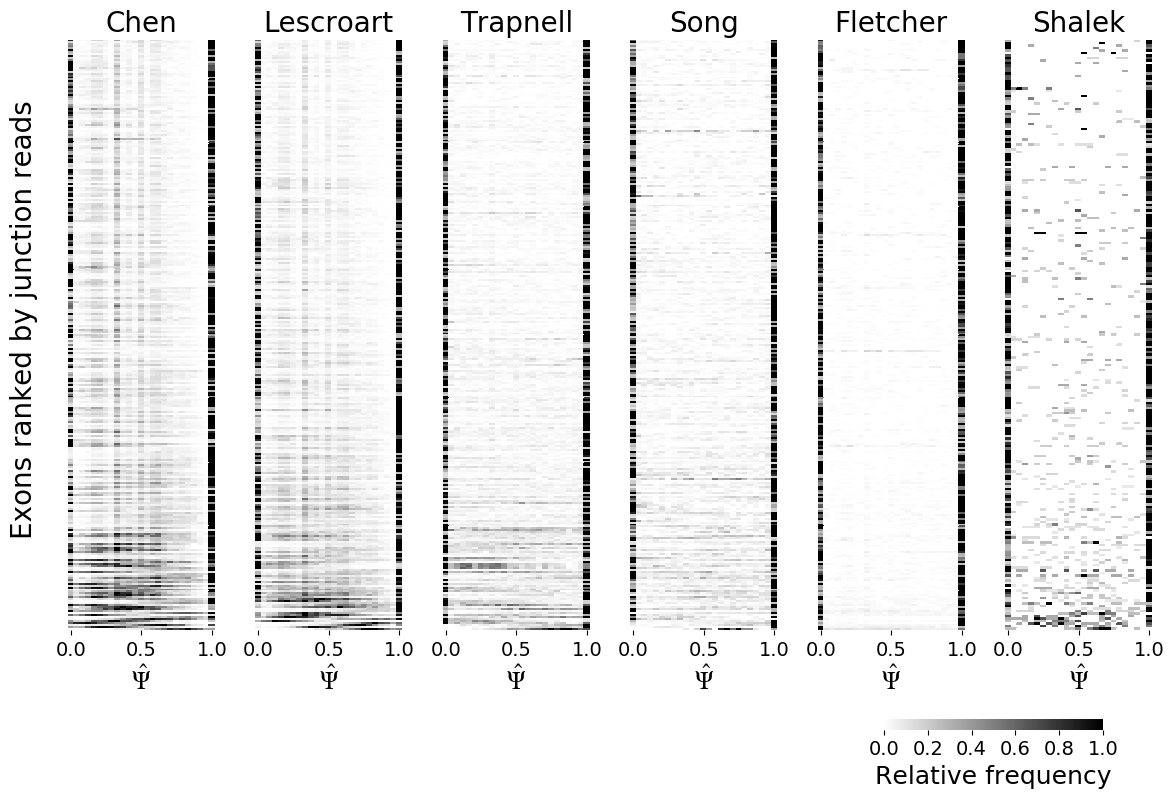

In [7]:
hist_list_300 = [x.loc[x.index[-300:]] for x in hist_list]
#scp.plot_histograms(hist_list_300, dset_name_list,fig_len=15, plot_name = 'PSI_distributions_top300')

scp.plot_histograms(hist_list_300, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_top300',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

In [8]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# Individual events shown in Figure 1

In [9]:
# scp.plot_event(chen[3], chen[4], 'chen', 'Cadm1_2', xtags = [1, 10, 100, 1000],
#                plot_dir = 'plots2/figure1/', just_show=True)

# scp.plot_event(chen[3], chen[4], 'chen', 'Thyn1_1', xtags = [1, 10, 100, 1000],
#                plot_dir = 'plots2/figure1/', just_show=True)

# scp.plot_event(chen[3], chen[4], 'chen', 'Rbm39_nmdSE_2', xtags = [1, 10, 100, 1000],
#                plot_dir = 'plots2/figure1/', just_show=True)

# Correlation between coverage and unimodality

In [10]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

# xlocations=[0, 1, 10, 100, 1000]
# #xtags = ['25', '50', '100', '200', '400', '800']
# scp.plot_ase_expression_v_binary(chen[3], chen[4], 'Chen', 'chen_all_exons', xlocations=xlocations,
#                                  xlabel='average SJ reads in exon',
#                               plot_dir = 'plots2/figure1/', just_show=False)

# plt.show()

# scp.plot_ase_expression_v_binary(lescroart[3], lescroart[4], 'Lescroart', 'lescroart_all_exons', xlocations=xlocations,
#                                  xlabel='average SJ reads in exon', 
#                               plot_dir = 'plots2/figure1/', just_show=False)
# plt.show()

# scp.plot_ase_expression_v_binary(trapnell[3], trapnell[4], 'Trapnell', 'trapnell_all_exons', xlocations=xlocations,
#                                  xlabel='average SJ reads in exon', 
#                               plot_dir = 'plots2/figure1/', just_show=False)
# plt.show()

# xlocations=[0, 1, 10, 100, 1000, 10000]
# scp.plot_ase_expression_v_binary(song[3], song[4], 'Song', 'song_all_exons', xlocations=xlocations,
#                                  xlabel='average SJ reads in exon', 
#                               plot_dir = 'plots2/figure1/', just_show=False)
# plt.show()

# xlocations=[0, 1, 10, 100]
# scp.plot_ase_expression_v_binary(das[3], das[4], 'Das', 'das_all_exons', xlocations=xlocations,
#                                  xlabel='average SJ reads in exon', 
#                               plot_dir = 'plots2/figure1/', just_show=False)
# plt.show()


In [11]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

# dset_name_list = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Treutlein', 'Gao', 'Friedman', 'Falcao', 'Das']

# pr_bar = []

# xlocations = [10, 1000, 4000, 16000]
# filtro = (chen[3].mean(axis=1) >=0.2) & (chen[3].mean(axis=1) <=0.8)
# pr_bar.append(scp.plot_cell_expression_v_binary(chen[3].loc[filtro], chen[4].loc[filtro], 'Chen', 'chen_intermediate', 
#                                                  xlocations=xlocations, xlabel='total SJ reads in cell',
#                                plot_dir = 'plots2/figure1/', just_show=False))

# plt.show()

# xlocations = [100, 1000,10000]
# xtags = ['2', '3', '4']
# filtro = (lescroart[3].mean(axis=1) >=0.2) & (lescroart[3].mean(axis=1) <=0.8)
# pr_bar.append(scp.plot_cell_expression_v_binary(lescroart[3].loc[filtro], lescroart[4].loc[filtro], 'Lescroart', 
#                                                 'lescroart_intermediate', xlocations=xlocations, 
#                                                 xlabel='log10 of total SJ reads in cell', xtags=xtags,
#                               plot_dir = 'plots2/figure1/', just_show=False))

# plt.show()

# xlocations = [1, 10, 100, 1000,10000]
# xtags = ['0', '1', '2', '3', '4']
# filtro = (trapnell[3].mean(axis=1) >=0.2) & (trapnell[3].mean(axis=1) <=0.8)
# pr_bar.append(scp.plot_cell_expression_v_binary(trapnell[3].loc[filtro], trapnell[4].loc[filtro], 'Trapnell', 
#                                                 'trapnell_intermediate', xlocations=xlocations, 
#                                                 xlabel='log10 of total SJ reads in cell', xtags=xtags,
#                               plot_dir = 'plots2/figure1/', just_show=False))

# plt.show()

# xlocations = [10000, 100000, 1000000]
# xtags = ['4', '5', '6']

# filtro = (song[3].mean(axis=1) >=0.2) & (song[3].mean(axis=1) <=0.8)
# pr_bar.append(scp.plot_cell_expression_v_binary(song[3].loc[filtro], song[4].loc[filtro], 'Song', 
#                                                 'song_intermediate',  xlocations=xlocations, 
#                                                 xlabel='log10 of total SJ reads in cell', xtags=xtags,
#                               plot_dir = 'plots2/figure1/', just_show=False))

# plt.show()

# xlocations = [1, 10, 100, 1000]
# xtags = ['0', '1', '2', '3']
# filtro = (das[3].mean(axis=1) >=0.2) & (das[3].mean(axis=1) <=0.8)
# pr_bar.append(scp.plot_cell_expression_v_binary(das[3].loc[filtro], das[4].loc[filtro], 'Das', 
#                                                 'das_intermediate', xlocations=xlocations, 
#                                                 xlabel='log10 of total SJ reads in cell', xtags=xtags,
#                               plot_dir = 'plots2/figure1/', just_show=False))

# plt.show()


In [12]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(12, 12)
# pr_bar2 = []

# filtro = (chen[3].mean(axis=1) >=0.2) & (chen[3].mean(axis=1) <=0.8)
# pr_bar2.append(scp.plot_ase_expression_v_binary(chen[3].loc[filtro], chen[4].loc[filtro], 'Chen', 
#                                                 'chen_intermediate', 
#                               plot_dir = 'plots2/figure1/', just_show=False))

# filtro = (lescroart[3].mean(axis=1) >=0.2) & (lescroart[3].mean(axis=1) <=0.8)
# pr_bar2.append(scp.plot_ase_expression_v_binary(lescroart[3].loc[filtro], lescroart[4].loc[filtro], 'Lescroart', 
#                                                 'lescroart_intermediate', 
#                               plot_dir = 'plots2/figure1/', just_show=False))

# filtro = (trapnell[3].mean(axis=1) >=0.2) & (trapnell[3].mean(axis=1) <=0.8)
# pr_bar2.append(scp.plot_ase_expression_v_binary(trapnell[3].loc[filtro], trapnell[4].loc[filtro], 'Trapnell', 
#                                                 'trapnell_intermediate', 
#                               plot_dir = 'plots2/figure1/', just_show=False))

# filtro = (song[3].mean(axis=1) >=0.2) & (song[3].mean(axis=1) <=0.8)
# pr_bar2.append(scp.plot_ase_expression_v_binary(song[3].loc[filtro], song[4].loc[filtro], 'Song', 
#                                                 'song_intermediate', 
#                               plot_dir = 'plots2/figure1/', just_show=False))

# filtro = (das[3].mean(axis=1) >=0.2) & (das[3].mean(axis=1) <=0.8)
# pr_bar2.append(scp.plot_ase_expression_v_binary(das[3].loc[filtro], das[4].loc[filtro], 'Das', 
#                                                 'das_intermediate', 
#                               plot_dir = 'plots2/figure1/', just_show=False))

In [13]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(14,8)

# fig, ax = plt.subplots(figsize=(14, 8))

# ax.bar([1, 2, 3, 4, 5], -(np.array(pr_bar)), color='navy')
# ax.tick_params(labelsize=18)
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

# ax.set_ylim((0,1))

# plt.ylabel("binary-coverage correlation in cells", fontsize=20)

# locs, labels = plt.yticks()

# newLabels = []

# newLabels.append('0.0')
# newLabels.append('-0.2')
# newLabels.append('-0.4')
# newLabels.append('-0.6')
# newLabels.append('-0.8')
# newLabels.append('-1.0')

# plt.yticks(locs, newLabels)

# plt.xticks([1, 2, 3, 4, 5], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Das'], fontsize=20, rotation='vertical')    



# plt.savefig('plots2/figure1/datasets_cell_correlations.pdf', bbox_inches='tight')
# plt.savefig('plots2/figure1/datasets_cell_correlations.png', dpi=300, bbox_inches='tight')

# plt.show()

In [14]:
# import matplotlib.pyplot as plt
# from matplotlib.cm import ScalarMappable

# fig, ax = plt.subplots(figsize=(14, 8))

# rects = ax.bar([1, 2, 3, 4, 5], -(np.array(pr_bar2)), color='navy')
# ax.tick_params(labelsize=18)
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

# ax.set_ylim((0,1))
# plt.ylabel("binary-coverage correlation in exons", fontsize=20)

# locs, labels = plt.yticks()

# newLabels = []

# newLabels.append('0.0')
# newLabels.append('-0.2')
# newLabels.append('-0.4')
# newLabels.append('-0.6')
# newLabels.append('-0.8')
# newLabels.append('-1.0')

# plt.yticks(locs, newLabels)

# plt.xticks([1, 2, 3, 4, 5], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Das'], fontsize=20, rotation='vertical')    


# # plt.show()
# plt.savefig('plots2/figure1/datasets_exon_correlations.svg', bbox_inches='tight')
# plt.savefig('plots2/figure1/datasets_exon_correlations.pdf', bbox_inches='tight')
# plt.savefig('plots2/figure1/datasets_exon_correlations.png', dpi=300, bbox_inches='tight')

# plt.show()

# Exon filtering (Figure 3)

In [15]:
chen_PSI = chen[3]
chen_read_counts = chen[4]

chen_meta_pseudotime = pd.read_csv('../../../data/chen/chen.meta_pseudotime.tab', sep='\t', index_col=0)
ES2i = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES2i']
ES = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES']
Epi = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Epi']
MN = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Motor neuron']
bio = list(ES2i) + list(ES) + list(Epi) + list(MN)
chen_tpm_tab = pd.read_csv('../../../data/chen/chen.tpm.gene_symbols.tab', sep='\t', index_col=0)[bio]
# chen_star_tab = pd.read_csv('../../../data/chen/chen.star.counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_el = pd.read_csv('../../../data/chen/chen.effective_length.gene_symbols.tab', sep='\t', index_col=0)[bio]
crpm_chen = pd.read_csv('../../../data/chen/chen_sr_score.tab', sep='\t', index_col = 0)[bio]
chen_mrna_counts = pd.read_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)

chen_PSI = chen[3][bio]
chen_read_counts = chen[4][bio]

###############################

lescroart_PSI = lescroart[3]
lescroart_read_counts = lescroart[4]
lescroart_mrna_counts = pd.read_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index_col=0)
lescroart_bio = lescroart_mrna_counts.columns
lescroart_tpm_tab = pd.read_csv('../../../data/lescroart/Lescroart.tpm.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
# lescroart_star_tab = pd.read_csv('../../../data/lescroart/Lescroart.star.counts.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_rsem_tab = pd.read_csv('../../../data/lescroart/Lescroart.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_el = pd.read_csv('../../../data/lescroart/Lescroart.effective_length.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
crpm_lescroart = pd.read_csv('../../../data/lescroart/lescroart_sr_score.tab', sep='\t', index_col = 0)

##############################

trapnell_PSI = trapnell[3]
trapnell_read_counts = trapnell[4]
trapnell_mrna_counts = pd.read_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index_col=0)
trapnell_bio = trapnell_mrna_counts.columns
trapnell_tpm_tab = pd.read_csv('../../../data/trapnell/trapnell.tpm.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
# trapnell_star_tab = pd.read_csv('../../../data/trapnell/trapnell.star.counts.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_rsem_tab = pd.read_csv('../../../data/trapnell/trapnell.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_el = pd.read_csv('../../../data/trapnell/trapnell.effective_length.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
crpm_trapnell = pd.read_csv('../../../data/trapnell/trapnell_sr_score.tab', sep='\t', index_col = 0)


###############################

song_PSI = song[3]
song_read_counts = song[4]
song_meta = pd.read_csv('../../../data/song/song_meta.tab', sep='\t', index_col=0)
song_bio = song_meta.index[song_meta.sample_type_s == 'Single Cell']
song_mrna_counts = pd.read_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index_col=0)
song_bio = [x for x in song_bio if x in song_mrna_counts.columns]
song_tpm_tab = pd.read_csv('../../../data/song/song.tpm.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
# song_star_tab = pd.read_csv('../../../data/song/song.star.counts.tab', sep='\t', index_col=0)[song_bio]
song_rsem_tab = pd.read_csv('../../../data/song/song.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
song_el = pd.read_csv('../../../data/song/song.effective_length.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
crpm_song = pd.read_csv('../../../data/song/song_sr_score.tab', sep='\t', index_col = 0)


###############################

das_PSI = das[3]
das_read_counts = das[4]
das_mrna_counts = pd.read_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index_col=0)
das_bio = das_mrna_counts.columns
das_tpm_tab = pd.read_csv('../../../data/das/das.tpm.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
# das_star_tab = pd.read_csv('../../../data/das/das.star.counts.tab', sep='\t', index_col=0)[das_bio]
das_rsem_tab = pd.read_csv('../../../data/das/Das.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
das_el = pd.read_csv('../../../data/das/Das.effective_length.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
crpm_das = pd.read_csv('../../../data/das/das_sr_score.tab', sep='\t', index_col = 0)


###############################

shalek_mrna_counts = pd.read_csv('shalek_mrna_counts.tab', sep='\t', index_col=0)
shalek_bio = shalek_mrna_counts.columns
shalek_tpm_tab = pd.read_csv('shalek.tpm.gene_symbols.tab', sep='\t', index_col=0)[shalek_bio]
shalek_rsem_tab = pd.read_csv('shalek.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[shalek_bio]
shalek_el = pd.read_csv('shalek.effective_length.gene_symbols.tab', sep='\t', index_col=0)[shalek_bio]

shalek_tpm_tab = pd.read_csv('shalek.tpm.gene_symbols.tab', sep='\t', index_col=0)[shalek_bio]
shalek_rsem_tab = pd.read_csv('shalek.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[shalek_bio]
shalek_el = pd.read_csv('shalek.effective_length.gene_symbols.tab', sep='\t', index_col=0)[shalek_bio]



In [16]:
# ### This runs the Census normalization

# chen_mrna_counts = spu.transform_tpm_to_counts(chen_tpm_tab, plot_hist = False, correct_high = True)
# print('chen')
# song_mrna_counts = spu.transform_tpm_to_counts(song_tpm_tab, plot_hist = False, correct_high = True)
# print('song')
# trapnell_mrna_counts = spu.transform_tpm_to_counts(trapnell_tpm_tab, plot_hist = False, correct_high = True)
# print('trapnell')
# lescroart_mrna_counts = spu.transform_tpm_to_counts(lescroart_tpm_tab, plot_hist = False, correct_high = True)
# print('lescroart')
# das_mrna_counts = spu.transform_tpm_to_counts(das_tpm_tab, plot_hist = False, correct_high = True)
# print('das')


# shalek_mrna_counts = spu.transform_tpm_to_counts(shalek_tpm_tab, plot_hist = True, correct_high = True, adjust_high=False)


# chen_mrna_counts.to_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index=True, header=True)
# song_mrna_counts.to_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index=True, header=True)
# trapnell_mrna_counts.to_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index=True, header=True)
# das_mrna_counts.to_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index=True, header=True)
# lescroart_mrna_counts.to_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index=True, header=True)
# shalek_mrna_counts.to_csv('shalek_mrna_counts.tab', sep='\t', index=True, header=True)

In [17]:
# song_mrna_counts = pd.read_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index_col=0)
# trapnell_mrna_counts = pd.read_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index_col=0)
# das_mrna_counts = pd.read_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index_col=0)
# lescroart_mrna_counts = pd.read_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index_col=0)

In [18]:
# SRA tables contain information on the average spot length for each dataset

song_srat = pd.read_csv('../../../data/song/SraRunTable.txt', sep='\t')
song_srat = song_srat.set_index('Run_s')#.columns
chen_srat = pd.read_csv('../../../data/chen/SraRunTable.txt', sep='\t')
chen_srat = chen_srat.set_index('Run_s')#.columns
trapnell_srat = pd.read_csv('../../../data/trapnell/SraRunTable.txt', sep='\t')
trapnell_srat = trapnell_srat.set_index('Run')#.columns
lescroart_srat = pd.read_csv('../../../data/lescroart/SraRunTable.txt', sep='\t')
lescroart_srat = lescroart_srat.set_index('Run')#.columns
das_srat = pd.read_csv('../../../data/das/SraRunTable.txt', sep='\t')
das_srat = das_srat.set_index('Run')#.columns

song_common_genes = [gene for gene in song_rsem_tab.index if ((gene in song_mrna_counts.index) & (gene in song_el.index))]
song_cells = song_mrna_counts.columns
song_counts_tab = song_rsem_tab.loc[song_common_genes, song_cells]
song_mrna_tab = song_mrna_counts.loc[song_common_genes, song_cells]
song_el_tab = song_el.loc[song_common_genes, song_cells]

trapnell_common_genes = [gene for gene in trapnell_rsem_tab.index if ((gene in trapnell_mrna_counts.index) & (gene in trapnell_el.index))]
trapnell_cells = trapnell_mrna_counts.columns
trapnell_counts_tab = trapnell_rsem_tab.loc[trapnell_common_genes, trapnell_cells]
trapnell_mrna_tab = trapnell_mrna_counts.loc[trapnell_common_genes, trapnell_cells]
trapnell_el_tab = trapnell_el.loc[trapnell_common_genes, trapnell_cells]

lescroart_common_genes = [gene for gene in lescroart_rsem_tab.index if ((gene in lescroart_mrna_counts.index) & (gene in lescroart_el.index))]
lescroart_cells = lescroart_mrna_counts.columns
lescroart_counts_tab = lescroart_rsem_tab.loc[lescroart_common_genes, lescroart_cells]
lescroart_mrna_tab = lescroart_mrna_counts.loc[lescroart_common_genes, lescroart_cells]
lescroart_el_tab = lescroart_el.loc[lescroart_common_genes, lescroart_cells]

das_common_genes = [gene for gene in das_rsem_tab.index if ((gene in das_mrna_counts.index) & (gene in das_el.index))]
das_cells = das_mrna_counts.columns
das_counts_tab = das_rsem_tab.loc[das_common_genes, das_cells]
das_mrna_tab = das_mrna_counts.loc[das_common_genes, das_cells]
das_el_tab = das_el.loc[das_common_genes, das_cells]

chen_common_genes = [gene for gene in chen_rsem_tab.index if ((gene in chen_mrna_counts.index) & (gene in chen_el.index))]
chen_cells = chen_mrna_counts.columns
chen_counts_tab = chen_rsem_tab.loc[chen_common_genes, chen_cells]
chen_mrna_tab = chen_mrna_counts.loc[chen_common_genes, chen_cells]
chen_el_tab = chen_el.loc[chen_common_genes, chen_cells]

shalek_common_genes = [gene for gene in shalek_rsem_tab.index if ((gene in shalek_mrna_counts.index) & (gene in shalek_el.index))]
shalek_cells = shalek_mrna_counts.columns
shalek_counts_tab = shalek_rsem_tab.loc[shalek_common_genes, shalek_cells]
shalek_mrna_tab = shalek_mrna_counts.loc[shalek_common_genes, shalek_cells]
shalek_el_tab = shalek_el.loc[shalek_common_genes, shalek_cells]

In [19]:
# # SRA tables contain information on the average spot length for each dataset

# song_srat = pd.read_csv('../../../data/song/SraRunTable.txt', sep='\t')
# song_srat = song_srat.set_index('Run_s')#.columns
# chen_srat = pd.read_csv('../../../data/chen/SraRunTable.txt', sep='\t')
# chen_srat = chen_srat.set_index('Run_s')#.columns
# trapnell_srat = pd.read_csv('../../../data/trapnell/SraRunTable.txt', sep='\t')
# trapnell_srat = trapnell_srat.set_index('Run')#.columns
# lescroart_srat = pd.read_csv('../../../data/lescroart/SraRunTable.txt', sep='\t')
# lescroart_srat = lescroart_srat.set_index('Run')#.columns
# das_srat = pd.read_csv('../../../data/das/SraRunTable.txt', sep='\t')
# das_srat = das_srat.set_index('Run')#.columns


In [20]:
# song_common_genes = [gene for gene in song_rsem_tab.index if ((gene in song_mrna_counts.index) & (gene in song_el.index))]
# song_cells = song_mrna_counts.columns
# song_counts_tab = song_rsem_tab.loc[song_common_genes, song_cells]
# song_mrna_tab = song_mrna_counts.loc[song_common_genes, song_cells]
# song_el_tab = song_el.loc[song_common_genes, song_cells]

# trapnell_common_genes = [gene for gene in trapnell_rsem_tab.index if ((gene in trapnell_mrna_counts.index) & (gene in trapnell_el.index))]
# trapnell_cells = trapnell_mrna_counts.columns
# trapnell_counts_tab = trapnell_rsem_tab.loc[trapnell_common_genes, trapnell_cells]
# trapnell_mrna_tab = trapnell_mrna_counts.loc[trapnell_common_genes, trapnell_cells]
# trapnell_el_tab = trapnell_el.loc[trapnell_common_genes, trapnell_cells]

# lescroart_common_genes = [gene for gene in lescroart_rsem_tab.index if ((gene in lescroart_mrna_counts.index) & (gene in lescroart_el.index))]
# lescroart_cells = lescroart_mrna_counts.columns
# lescroart_counts_tab = lescroart_rsem_tab.loc[lescroart_common_genes, lescroart_cells]
# lescroart_mrna_tab = lescroart_mrna_counts.loc[lescroart_common_genes, lescroart_cells]
# lescroart_el_tab = lescroart_el.loc[lescroart_common_genes, lescroart_cells]

# das_common_genes = [gene for gene in das_rsem_tab.index if ((gene in das_mrna_counts.index) & (gene in das_el.index))]
# das_cells = das_mrna_counts.columns
# das_counts_tab = das_rsem_tab.loc[das_common_genes, das_cells]
# das_mrna_tab = das_mrna_counts.loc[das_common_genes, das_cells]
# das_el_tab = das_el.loc[das_common_genes, das_cells]

# chen_common_genes = [gene for gene in chen_rsem_tab.index if ((gene in chen_mrna_counts.index) & (gene in chen_el.index))]
# chen_cells = chen_mrna_counts.columns
# chen_counts_tab = chen_rsem_tab.loc[chen_common_genes, chen_cells]
# chen_mrna_tab = chen_mrna_counts.loc[chen_common_genes, chen_cells]
# chen_el_tab = chen_el.loc[chen_common_genes, chen_cells]

In [21]:
song_len = song_srat.loc[song_cells, 'AvgSpotLen_l']
das_len = das_srat.loc[das_cells, 'AvgSpotLen']
chen_len = chen_srat.loc[chen_cells, 'AvgSpotLen_l']
trapnell_len = trapnell_srat.loc[trapnell_cells, 'AvgSpotLen']
lescroart_len = lescroart_srat.loc[lescroart_cells, 'AvgSpotLen']

In [22]:
song_c = ((song_counts_tab*(song_mrna_tab > 0)*song_len).sum()/(song_mrna_tab*song_el_tab).sum())
lescroart_c = ((lescroart_counts_tab*(lescroart_mrna_tab > 0)*lescroart_len).sum()/(lescroart_mrna_tab*lescroart_el_tab).sum())
trapnell_c = ((trapnell_counts_tab*(trapnell_mrna_tab > 0)*trapnell_len).sum()/(trapnell_mrna_tab*trapnell_el_tab).sum())
das_c = ((das_counts_tab*(das_mrna_tab > 0)*das_len).sum()/(das_mrna_tab*das_el_tab).sum())
chen_c = ((chen_counts_tab*(chen_mrna_tab > 0)*chen_len).sum()/(chen_mrna_tab*chen_el_tab).sum())
shalek_c = ((shalek_counts_tab*(shalek_mrna_tab > 0)*202).sum()/(shalek_mrna_tab*shalek_el_tab).sum())

In [23]:
# chen_SR = (crpm_chen/chen_c)[chen_cells]
# mrna_per_event_chen = chen_mrna_counts.loc[[x.split('_')[0] for x in chen_SR.index]]
# mrna_per_event_chen.index = chen_SR.index

# song_SR = (crpm_song/song_c)[song_cells]
# mrna_per_event_song = song_mrna_counts.loc[[x.split('_')[0] for x in song_SR.index]][song_cells]
# mrna_per_event_song.index = song_SR.index

# trapnell_SR = (crpm_trapnell/trapnell_c)[trapnell_cells]
# mrna_per_event_trapnell = trapnell_mrna_counts.loc[[x.split('_')[0] for x in trapnell_SR.index]][trapnell_cells]
# mrna_per_event_trapnell.index = trapnell_SR.index

# lescroart_SR = (crpm_lescroart/lescroart_c)[lescroart_cells]
# mrna_per_event_lescroart = lescroart_mrna_counts.loc[[x.split('_')[0] for x in lescroart_SR.index]][lescroart_cells]
# mrna_per_event_lescroart.index = lescroart_SR.index

# das_SR = (crpm_das/das_c)[das_cells]
# mrna_per_event_das = das_mrna_counts.loc[[x.split('_')[0] for x in das_SR.index]]
# mrna_per_event_das.index = das_SR.index

mrna_per_event_chen = chen_mrna_counts.loc[[x.split('_')[0] for x in chen_PSI.index if (x.split('_')[0] in chen_mrna_counts.index)]]
mrna_per_event_chen.index = [x for x in chen_PSI.index if (x.split('_')[0] in chen_mrna_counts.index)]

mrna_per_event_song = song_mrna_counts.loc[[x.split('_')[0] for x in song_PSI.index if (x.split('_')[0] in song_mrna_counts.index)]][song_cells]
mrna_per_event_song.index = [x for x in song_PSI.index if (x.split('_')[0] in song_mrna_counts.index)]

mrna_per_event_trapnell = trapnell_mrna_counts.loc[[x.split('_')[0] for x in trapnell_PSI.index if (x.split('_')[0] in trapnell_mrna_counts.index)]][trapnell_cells]
mrna_per_event_trapnell.index = [x for x in trapnell_PSI.index if (x.split('_')[0] in trapnell_mrna_counts.index)]

mrna_per_event_lescroart = lescroart_mrna_counts.loc[[x.split('_')[0] for x in lescroart_PSI.index if (x.split('_')[0] in lescroart_mrna_counts.index)]][lescroart_cells]
mrna_per_event_lescroart.index = [x for x in lescroart_PSI.index if (x.split('_')[0] in lescroart_mrna_counts.index)]

mrna_per_event_das = das_mrna_counts.loc[[x.split('_')[0] for x in das_PSI.index if (x.split('_')[0] in das_mrna_counts.index)]]
mrna_per_event_das.index = [x for x in das_PSI.index if (x.split('_')[0] in das_mrna_counts.index)]

mrna_per_event_shalek = shalek_mrna_counts.loc[[x.split('_')[0] for x in shalek_PSI.index if (x.split('_')[0] in shalek_mrna_counts.index)]]
mrna_per_event_shalek.index = [x for x in shalek_PSI.index if (x.split('_')[0] in shalek_mrna_counts.index)]

In [24]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI, chen_mrna_counts, 0.05)
chen_int_exons = [x for x in chen_int_exons if x in mrna_per_event_chen.index]

song_int_genes, song_int_exons = spu.get_int_events(song_PSI, song_mrna_counts, 0.05)
song_int_exons = [x for x in song_int_exons if x in mrna_per_event_song.index]

trapnell_int_genes, trapnell_int_exons = spu.get_int_events(trapnell_PSI, trapnell_mrna_counts, 0.05)
trapnell_int_exons = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]

lescroart_int_genes, lescroart_int_exons = spu.get_int_events(lescroart_PSI, lescroart_mrna_counts, 0.05)
lescroart_int_exons = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

das_int_genes, das_int_exons = spu.get_int_events(das_PSI, das_mrna_counts, 0.05)
das_int_exons = [x for x in das_int_exons if x in mrna_per_event_das.index]

shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]

In [25]:
reads_song, mrna_song, binary_song, psi_song = spu.get_dataset_averages(song_PSI, song_read_counts, 
                                                                        song_mrna_counts, song_int_exons)
reads_das, mrna_das, binary_das, psi_das = spu.get_dataset_averages(das_PSI, das_read_counts, 
                                                                     das_mrna_counts, das_int_exons)
reads_chen, mrna_chen, binary_chen, psi_chen = spu.get_dataset_averages(chen_PSI, chen_read_counts, 
                                                                        chen_mrna_counts, chen_int_exons)
reads_lescroart, mrna_lescroart, binary_lescroart, psi_lescroart = spu.get_dataset_averages(lescroart_PSI, 
                                                                                            lescroart_read_counts, 
                                                                                            lescroart_mrna_counts, 
                                                                                             lescroart_int_exons)
reads_trapnell, mrna_trapnell, binary_trapnell, psi_trapnell = spu.get_dataset_averages(trapnell_PSI, trapnell_read_counts, 
                                                                          trapnell_mrna_counts, trapnell_int_exons)
reads_shalek, mrna_shalek, binary_shalek, psi_shalek = spu.get_dataset_averages(shalek_PSI, shalek_read_counts, 
                                                                          shalek_mrna_counts, shalek_int_exons)

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


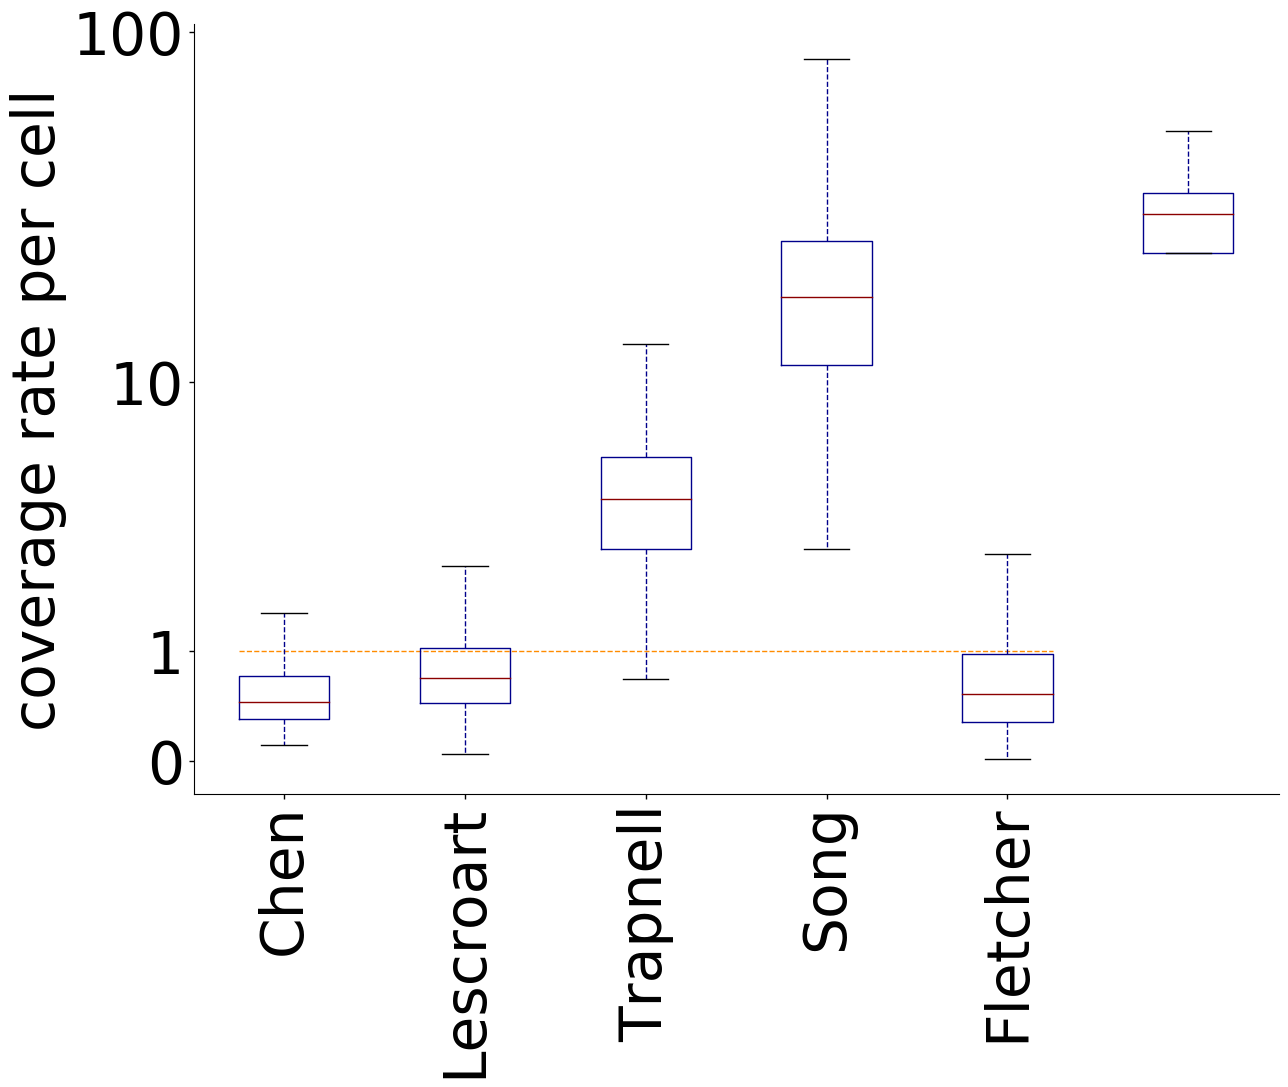

In [26]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']

scp.plot_boxplot([np.log10(chen_c+1),np.log10(lescroart_c+1), np.log10(trapnell_c+1), np.log10(song_c+1), np.log10(das_c+1),
                 np.log10(shalek_c+1)], 
                 'coverage rate per cell', dset_names, 
                 'Cj_per_cell', ylocs = [0, np.log10(2), np.log10(11), np.log10(101)],
                 ytags = ['0', '1', '10', '100'], plot_line = np.log10(2), save_dir='plots2/figure3/')

plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


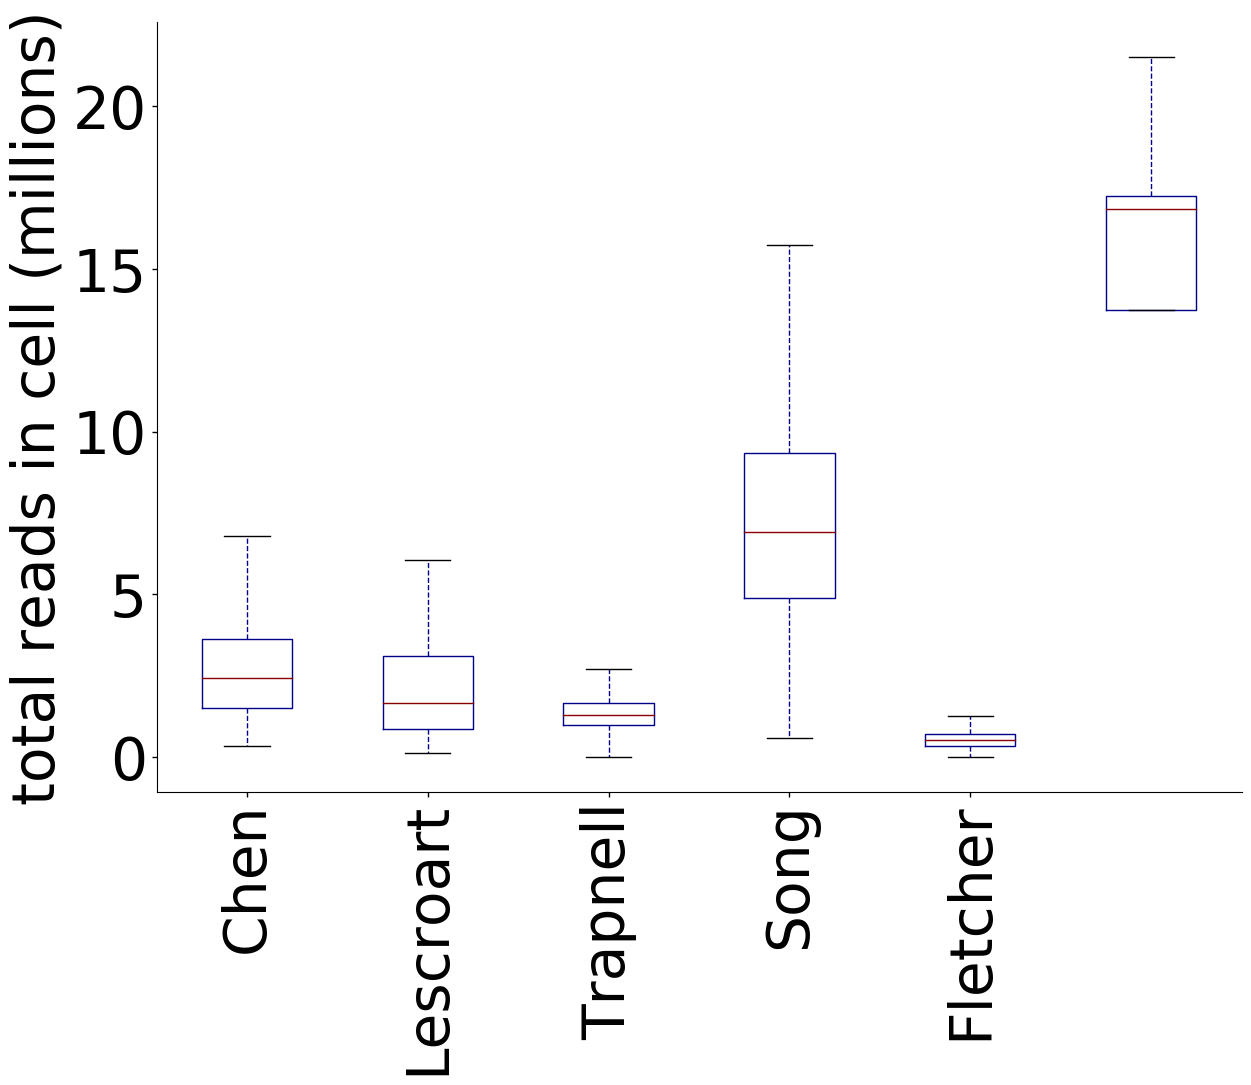

In [27]:
read_counts_chen = chen_rsem_tab.sum(axis=0)
read_counts_song = song_rsem_tab.sum(axis=0)
read_counts_trapnell = trapnell_rsem_tab.sum(axis=0)
read_counts_lescroart = lescroart_rsem_tab.sum(axis=0)
read_counts_das = das_rsem_tab.sum(axis=0)
read_counts_shalek = shalek_rsem_tab.sum(axis=0)


reads_df = [read_counts_chen, read_counts_lescroart, read_counts_trapnell, 
                      read_counts_song, read_counts_das, read_counts_shalek]


scp.plot_boxplot(reads_df, 'total reads in cell (millions)', dset_names, 'total_reads_boxplot', 
                 ylocs =[0, 5000000, 10000000, 15000000, 20000000], 
                 ytags = ['0', '5', '10', '15', '20'], save_dir='plots/figure3/')


plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


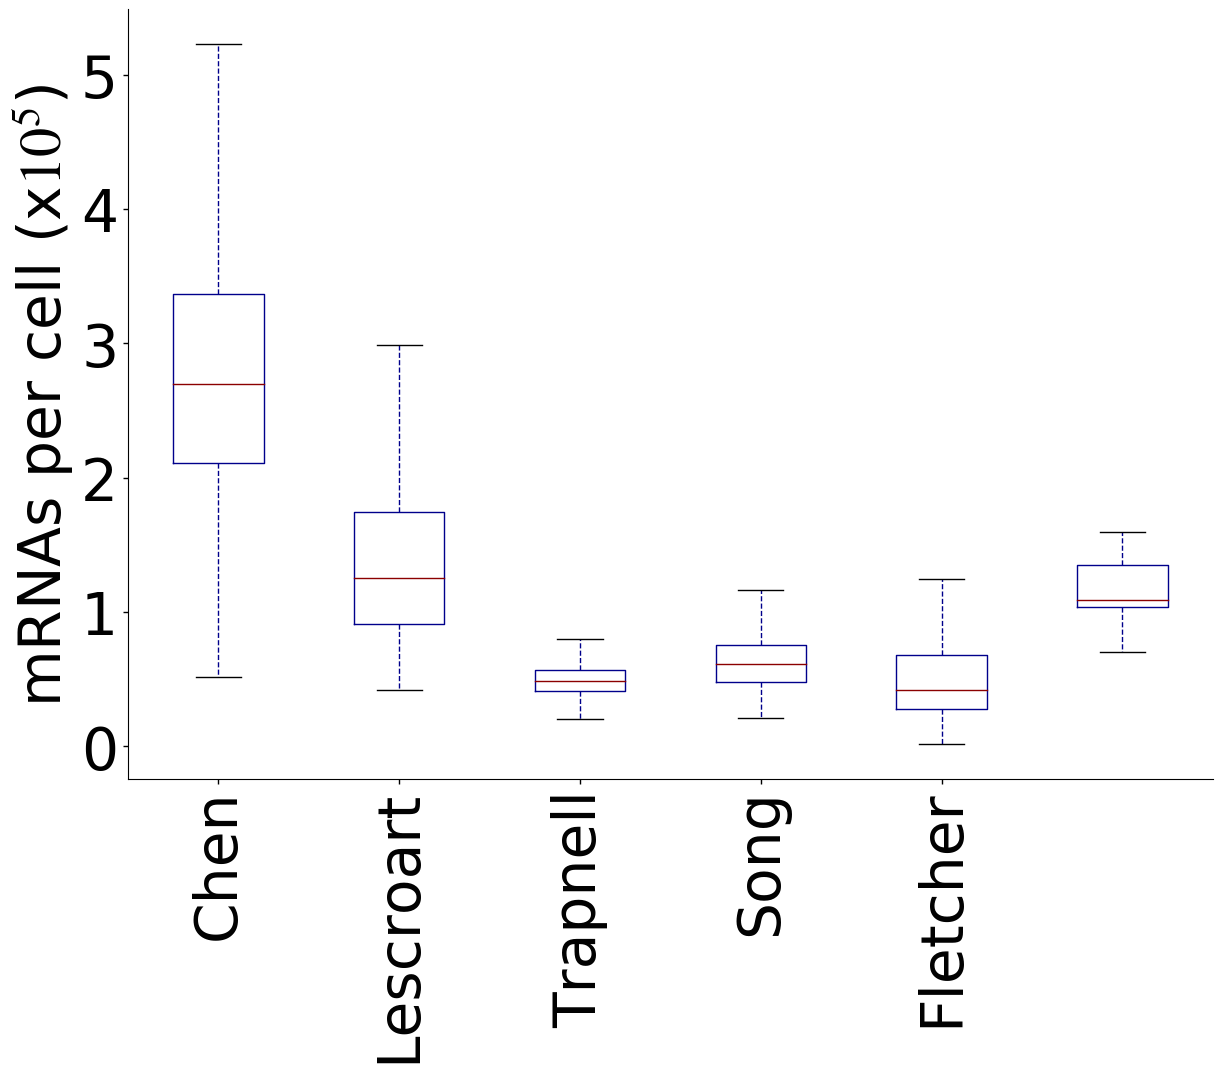

In [28]:
cuentas_chen = chen_mrna_counts.sum(axis=0)
cuentas_song = song_mrna_counts.sum(axis=0)
cuentas_trapnell = trapnell_mrna_counts.sum(axis=0)
cuentas_lescroart = lescroart_mrna_counts.sum(axis=0)
cuentas_das = das_mrna_counts.sum(axis=0)
cuentas_shalek = shalek_mrna_counts.sum(axis=0)

cuentas_df = [cuentas_chen, cuentas_lescroart, cuentas_trapnell, cuentas_song, cuentas_das, cuentas_shalek]
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']


scp.plot_boxplot(cuentas_df, 'mRNAs per cell (x$10^5$)', dset_names, 'mrna_cells_boxplot', xlocs = np.array([1, 2, 3, 4, 5]),
                 ylocs=[0, 100000, 200000, 300000, 400000, 500000], 
                 ytags=['0', '1', '2', '3', '4', '5'], save_dir='plots2/figure3/')

plt.show()

In [29]:
# scp.plot_information_map2(mrna_chen, reads_chen, binary_chen, crpm_chen, 'Chen', 
#                          [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                            [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                          stat = 'median', 
#                          mrna_min = 10, read_min = (10*chen_c).mean(), save_name = 'chen_binary_median',
#                          plot_dir = 'plots2/figure3/')


# scp.plot_information_map2(mrna_song, reads_song, binary_song, crpm_song, 'Song',
#                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                            [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
#                          ['0', '1', '10', '100', '1000', '10000'],
#                          stat = 'median', max_x = 3, max_y = 4,
#                         save_name = 'song_binary_median', mrna_min = 10, read_min=(10*song_c).mean(),
#                          plot_dir = 'plots2/figure3/')

# scp.plot_information_map2(mrna_lescroart, reads_lescroart, binary_lescroart, 
#                          crpm_lescroart, 'Lescroart', 
#                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                            [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                          stat = 'median', save_name = 'lescroart_binary_median', mrna_min = 10, 
#                          read_min=(10*lescroart_c).mean(), plot_dir = 'plots2/figure3/')

# scp.plot_information_map2(mrna_trapnell, reads_trapnell, binary_trapnell, crpm_trapnell, 
#                      'Trapnell',  [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                            [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
#                          ['0', '1', '10', '100', '1000', '10000'],
#                          stat = 'median', save_name = 'trapnell_binary_median', 
#                           max_x = 3, max_y = 4, mrna_min = 10, read_min=(10*trapnell_c).mean(),
#                          plot_dir = 'plots2/figure3/')

# scp.plot_information_map2(mrna_das, reads_das, binary_das, crpm_das, 
#                      'Fletcher', [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                            [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                          stat = 'median', save_name = 'fletcher_binary_median', mrna_min = 10, read_min=(10*das_c).mean(),
#                          plot_dir = 'plots2/figure3/')

# scp.plot_information_map2(mrna_shalek, reads_shalek, binary_shalek, shalek_PSI, 
#                      'Fletcher', [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
#                          ['0', '1', '10', '100', '1000'],
#                            [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
#                          ['0', '1', '10', '100', '1000', '10000'],
#                          stat = 'median', save_name = 'shalek_binary_median', mrna_min = 10, read_min=(10*das_c).mean(),
#                          plot_dir = 'plots2/figure3/')

# plt.show()

In [30]:
def plot_pca(pca_tab, psi_tab, mrna_tab, reads_tab, cj, event, mrna_min, cmap='viridis', filter_cells=True):
    
    #pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (rpm_tab.loc[event] >= rpm_tab.mean(axis=1).quantile(0.1))]
    
    
    if filter_cells:
        read_min = mrna_min*cj*(1+psi_tab.loc[event])

        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (reads_tab.loc[event] >= read_min)]
        
    else:
        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > -1) & (reads_tab.loc[event] >= -1)]


    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=150, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.loc[pass_cells, 'PC1'], pca_tab.loc[pass_cells, 'PC2'], 
                c=psi_tab.loc[event, pass_cells], s=250, edgecolors='none', vmin=0, vmax=1, cmap=cmap)
    
    ax.plot(chen_pca.line_1, chen_pca.line_2, c='red',linewidth=2)

    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    
    ax.set_xlim([-65, 102])
    ax.set_ylim([-55, 63])
    
    cb = plt.colorbar(sc, shrink = 0.8)
    cb.set_label(label='$\Psi$',size=42)
    cb.ax.tick_params(labelsize=42)
    
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.tick_params(labelsize=42)

    plt.ylabel('PC2', fontsize=42)
    plt.xlabel('PC1', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)
    
    if filter_cells:

        plt.savefig('plots2/figure3/events/'+event+'.pca.svg', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pca.pdf', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pca.png', dpi=300, bbox_inches='tight')
        
    else:
        
        plt.savefig('plots2/figure3/events/'+event+'.pca.no_filter.svg', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pca.no_filter.pdf', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pca.no_filter.png', dpi=300, bbox_inches='tight')

        
    
    
    #plt.show()
    
    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.pseudotime, psi_tab.loc[event], c='skyblue', s=150, edgecolors='none', alpha=0.5)
    ax.scatter(pca_tab.loc[pass_cells, 'pseudotime'], psi_tab.loc[event, pass_cells], 
                c='navy', s=250, edgecolors='none')
    
    ax.set_ylim((-0.05,1.05))
    
    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.tick_params(labelsize=42)

    plt.ylabel('$\Psi$', fontsize=42)
    plt.xlabel('pseudotime', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)

    if filter_cells:
    
        plt.savefig('plots2/figure3/events/'+event+'.pseudotime.svg', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pseudotime.pdf', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pseudotime.png', dpi=300, bbox_inches='tight')
        
    else:
        plt.savefig('plots2/figure3/events/'+event+'.pseudotime.no_filter.svg', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pseudotime.no_filter.pdf', bbox_inches='tight')
        plt.savefig('plots2/figure3/events/'+event+'.pseudotime.no_filter.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    

In [31]:
chen_pca = pd.read_csv('../../../data/chen/chen.pca.tab', sep='\t', index_col=0)
chen_pca = chen_pca.sort_values('pseudotime')
chen_pca.PC2 = -chen_pca.PC2
chen_pca.line_2 = -chen_pca.line_2
chen_index = [x for x in chen_pca.sort_values('pseudotime').index if x in mrna_per_event_chen.columns]


chen_pca = chen_pca.loc[chen_index]
chen_PSI = chen_PSI[chen_index]
mrna_per_event_chen = mrna_per_event_chen[chen_index]
chen_read_counts = chen_read_counts[chen_index]
chen_c = chen_c.loc[chen_index]

song_pca = pd.read_csv('../../../data/song/song.pca.tab', sep='\t', index_col=0).loc[song_PSI.columns]
song_pca = song_pca.sort_values('pseudotime')
song_pca.PC2 = -song_pca.PC2
song_index = [x for x in song_pca.sort_values('pseudotime').index if x in mrna_per_event_song.columns]

song_pca = song_pca.loc[song_index]
song_PSI = song_PSI[song_index]
mrna_per_event_song = mrna_per_event_song[song_index]

In [34]:
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Cadm1_2', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Cadm1_2', 10, filter_cells=False)

In [35]:
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Rpn2_1', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Clta_4', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Mff_3', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Tecr_4', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Idh3g_1', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Zfp207_1', 10)


In [ ]:
chen_sj = chen_ratio[chen_c.index].mean()
das_sj = das_ratio[das_c.index].mean()
trapnell_sj = trapnell_ratio[trapnell_c.index].mean()
lescroart_sj = lescroart_ratio[lescroart_c.index].mean()
song_sj = song_ratio[song_c.index].mean()
shalek_sj = shalek_ratio[shalek_c.index].mean()

In [ ]:
song_sc = song_meta.loc[song_meta.sample_type_s == 'Single Cell']
good_cells = mrna_per_event_song.columns
song_ipsc = [x for x in song_sc.loc[song_sc.cell_type_s == 'Induced pluripotent cells'].index if x in good_cells]
song_npc = [x for x in song_sc.loc[song_sc.cell_type_s == 'Neural progenitor cells'].index if x in good_cells]
song_mn = [x for x in song_sc.loc[song_sc.cell_type_s == 'Motor neurons'].index if x in good_cells]

In [ ]:
plt.scatter(np.log10(mrna_per_event_chen.loc['Irgm1_1']+1), chen_PSI.loc['Irgm1_1'])
plt.xlabel('log10(mRNA + 1)')
plt.title('Irgm1_1, all cells')
plt.ylabel('$\Psi$')
plt.show()

In [ ]:
plt.hist(chen_PSI.loc['Dync1i2_2', MN].dropna())
plt.title('Dync1i2_1 in MNs, Chen dataset')
plt.xlabel('$\Psi$')
plt.ylabel('frequency')
plt.show()

plt.show()

In [ ]:
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Dync1i2_2', 10)
plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Dync1i2_2', 10, filter_cells=False)
plt.show()

In [36]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def filter_psi(psi_tab, int_exons, mrna_tab, cj, reads_tab, mrna_min, reads_min=0, cell_min=0.5):
    
    int_exons = [x for x in int_exons if x in mrna_tab.index]
    print(len(int_exons))
    reads_tab = reads_tab.loc[int_exons, mrna_tab.columns]
    mrna_tab = mrna_tab.loc[int_exons, mrna_tab.columns]
    cj = cj.loc[mrna_tab.columns]
    psi_tab = psi_tab.loc[int_exons, mrna_tab.columns]

    cj_filter = (reads_tab.loc[int_exons, cj.index] >= (mrna_min*cj*(1+psi_tab.loc[int_exons, cj.index])))
    mrna_filter = (mrna_tab.loc[int_exons, cj.index] >= mrna_min) & (reads_tab.loc[int_exons, cj.index] >= reads_min) #&
    quality = ((mrna_filter & cj_filter).mean(axis=1) >= cell_min)
    good_exons = quality.loc[quality].index

    filter_tab = (mrna_filter & cj_filter).loc[good_exons]
    psi_tab_mrna = psi_tab.loc[good_exons]

    print(len(good_exons))

    PSI_filtered = psi_tab_mrna
    PSI_filtered = psi_tab_mrna.mask(~filter_tab)
    PSI_filtered = PSI_filtered.dropna(how='all') # might be unnecessary
    PSI_mrna_filtered = PSI_filtered.loc[PSI_filtered.isnull().mean(axis=1) < (1-cell_min)] # might be unnecessary
    total_exons = len(PSI_mrna_filtered.index)
    
    
    mrna_filtered = mrna_tab.loc[PSI_filtered.index].mask(~filter_tab)
    reads_filtered = reads_tab.loc[PSI_filtered.index].mask(~filter_tab)
    #PSI_mrna_z = get_zscore2(PSI_mrna_filtered)

    return PSI_filtered, PSI_mrna_filtered, good_exons, mrna_filtered, reads_filtered


def hartigan_test(x_list):
    ht_input = 'c(' + ','.join([str(x) for x in x_list]) + ')'
    ht_test_r = dt.dip_test(x=robjects.r(ht_input))
    ht_test_py = rpyn.rpy2py(ht_test_r)
    ht_statistic = ht_test_py[0][0]
    ht_pval = ht_test_py[1][0]
    return ht_statistic, ht_pval

def process_subpop(subpop, psi, mrna, mrna_per_event, reads, cj, psi_min = 0.2, mrna_min=10, reads_min = 0, cell_min = 0.5):

    int_genes, int_exons = spu.get_int_events(psi[subpop], mrna[subpop], psi_min)
    int_exons = [x for x in int_exons if x in mrna_per_event.index]
    PSI_filtered, PSI_mrna_filtered, good_exons, mrna_filtered, reads_filtered = filter_psi(psi[subpop], int_exons, 
                                                                     mrna_per_event[subpop], cj.loc[subpop], 
                                                                     reads[subpop], mrna_min, reads_min = reads_min,
                                                                                            cell_min=cell_min)


    good_cells = PSI_filtered.dropna(axis=1, how='all').columns
    good_subpop = [x for x in subpop if x in good_cells]
    PSI_good = PSI_filtered[good_cells]

    hist_complete, hist_intermediate = scp.get_bins_table2(PSI_filtered[good_subpop], mrna_filtered[good_subpop], 0.1)

    
    return PSI_filtered, good_exons, mrna_filtered, reads_filtered, hist_complete, hist_intermediate
    


In [ ]:
#vector=rpyn.r2numpy(dt.dip_test(x=robjects.r('c(0,0,0,0)')))

In [ ]:
# plt.scatter(pvals,multipletests(pvals, method='fdr_bh')[1])
# plt.show()

In [ ]:


# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_ES2i',
#                     plot_title = "", 
#                     ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

# plt.show()

In [ ]:
chen_ES2i_filtered = process_subpop(ES2i, chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_sj, 0.2, 6, 10)
chen_ES_filtered = process_subpop(ES, chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_sj, 0.2, 6, 10)
chen_Epi_filtered = process_subpop(Epi, chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_sj, 0.2, 6, 10)
chen_MN_filtered = process_subpop(MN, chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_sj, 0.2, 6, 10)




In [ ]:
pvals = []

for subset in [chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered]:

    for event in subset[0].index:

        ht = hartigan_test(subset[0].loc[event].dropna())
        pvals.append(ht[1])
        
        
bh_correction = multipletests(pvals, method='fdr_bh')
figsize(6, 4)

es2i_t = 0
es_t = 0
epi_t = 0
mn_t = 0

i = 0
j = 0
cell_type = ['ES2i', 'ES', 'Epi', 'MN']
for subset in [chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered]:

    for event in subset[0].index:

        if bh_correction[0][i]:
            
            if cell_type[j] == 'ES2i':
                es2i_t += 1
            elif cell_type[j] == 'ES':
                es_t += 1
            if cell_type[j] == 'Epi':
                epi_t += 1
            if cell_type[j] == 'MN':
                mn_t += 1
            print(event)
            
            plt.hist(subset[0].loc[event].dropna(), range=[0,1], density=True)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.xlabel(r'$\Psi$', fontsize=24)
            plt.ylabel('frequency', fontsize=24)
            plt.show()
            
            good_cells = subset[0].loc[event].dropna().index
            
#             print(len(good_cells))
            
#             print(len(chen_PSI.loc[event, ES2i].dropna()))
            
            sc = plt.scatter(chen_pca.loc[good_cells, 'PC1'], chen_pca.loc[good_cells, 'PC2'], 
                c=subset[0].loc[event, good_cells], vmin = 0, vmax=1)
        
            plt.colorbar(sc)
        
            plt.xlabel('PC1', fontsize=24)
            plt.ylabel('PC2', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            
            plt.show()
            
            
            plt.scatter(np.log10(mrna_per_event_chen.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(mRNA counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ' ' + cell_type[j], fontsize=24)
            plt.show()
            
            
            plt.scatter(np.log10(chen_read_counts.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(SJ read counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.show()
        i += 1
        
    j += 1
        
        
        
        
        
# figsize(6,4)
# for x in chen_mn_hist_complete_f.index:
#     print(x)
#     plt.scatter(chen_pca.loc[good_MN, 'PC1'], chen_pca.loc[good_MN, 'PC2'], 
#                 c=chen_PSI_good.loc[x, good_MN])
#     plt.show()
    
#     plt.scatter(np.log10(mrna_filtered.loc[x, good_MN]+1), chen_PSI_filtered.loc[x, good_MN], c='navy', alpha=0.5)
#     plt.show()
#     plt.scatter(np.log10(reads_filtered.loc[x, good_MN]+1), chen_PSI_filtered.loc[x, good_MN], c='navy', alpha=0.5)
    
#     plt.show()
#     paso = chen_PSI_filtered.loc[x, good_MN].dropna().index
    
#     plt.scatter(chen_meta_pseudotime.loc[paso, 'pseudotime'], chen_PSI_filtered.loc[x, paso])
    
#     plt.show()
#     print(spearmanr(chen_meta_pseudotime.loc[paso, 'pseudotime'], chen_PSI_filtered.loc[x, paso]))
    
#     male_MN = np.array(good_MN)[chen_meta_pseudotime.loc[good_MN].sex == 'male']
#     female_MN = np.array(good_MN)[chen_meta_pseudotime.loc[good_MN].sex == 'female']
#     plt.hist(chen_PSI_filtered.loc[x, male_MN].dropna(), alpha=0.75, color='skyblue', label='male', density=True)
#     plt.hist(chen_PSI_filtered.loc[x, female_MN].dropna(), alpha=0.5, color='forestgreen', label='female', density=True)
#     plt.title(x)
#     plt.xlabel(r'$\Psi$')
#     plt.ylabel('frequency')
#     plt.legend()
#     plt.show()
        

In [ ]:
hist_list = [chen_ES2i_filtered[4], chen_ES_filtered[4], chen_Epi_filtered[4], chen_MN_filtered[4]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
figsize(6, 4)

es2i_t = 0
es_t = 0
epi_t = 0
mn_t = 0

i = 0
j = 0
cell_type = ['ES2i', 'ES', 'Epi', 'MN']
for subset in [chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered]:

    for event in subset[0].index:

        token = subset[0].loc[event].dropna().quantile(0.25) <= 0.25
        token = token and subset[0].loc[event].dropna().quantile(0.75) >= 0.75
        if token:
            
            if cell_type[j] == 'ES2i':
                es2i_t += 1
            elif cell_type[j] == 'ES':
                es_t += 1
            if cell_type[j] == 'Epi':
                epi_t += 1
            if cell_type[j] == 'MN':
                mn_t += 1
            print(event)
            
            plt.hist(subset[0].loc[event].dropna(), range=[0,1], density=True)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.xlabel(r'$\Psi$', fontsize=24)
            plt.ylabel('frequency', fontsize=24)
            plt.show()
            
            good_cells = subset[0].loc[event].dropna().index
            
#             print(len(good_cells))
            
#             print(len(chen_PSI.loc[event, ES2i].dropna()))
            
            sc = plt.scatter(chen_pca.loc[good_cells, 'PC1'], chen_pca.loc[good_cells, 'PC2'], 
                c=subset[0].loc[event, good_cells], vmin = 0, vmax=1)
        
            plt.colorbar(sc)
        
            plt.xlabel('PC1', fontsize=24)
            plt.ylabel('PC2', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            
            plt.show()
            
            
            plt.scatter(np.log10(mrna_per_event_chen.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(mRNA counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ' ' + cell_type[j], fontsize=24)
            plt.show()
            
            
            plt.scatter(np.log10(chen_read_counts.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(SJ read counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.show()
        i += 1
        
    j += 1
        
        
        

In [ ]:
song_iPSC_filtered = process_subpop(song_ipsc, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, song_sj,
                                   0.2, 6, 10)
song_NPC_filtered = process_subpop(song_npc, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, song_sj,
                                   0.2, 6, 10)
song_MN_filtered = process_subpop(song_mn, song_PSI, song_mrna_counts, mrna_per_event_song, song_read_counts, song_sj,
                                   0.2, 6, 10)


In [ ]:
pvals = []

for subset in [song_iPSC_filtered, song_NPC_filtered, song_MN_filtered]:

    for event in subset[0].index:

        ht = hartigan_test(subset[0].loc[event].dropna())
        pvals.append(ht[1])
        
        
bh_correction = multipletests(pvals, method='fdr_bh')
figsize(6, 4)

ipsc_t = 0
npc_t = 0
# epi_t = 0
mn_t = 0

i = 0
j = 0
cell_type = ['iPSC', 'NPC', 'MN']
for subset in [song_iPSC_filtered, song_NPC_filtered, song_MN_filtered]:

    for event in subset[0].index:

        if bh_correction[0][i]:
            
            if cell_type[j] == 'iPSC':
                ipsc_t += 1
            elif cell_type[j] == 'NPC':
                npc_t += 1
            if cell_type[j] == 'MN':
                mn_t += 1
            print(event)
            
            plt.hist(subset[0].loc[event].dropna(), range=[0,1], density=True)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.xlabel(r'$\Psi$', fontsize=24)
            plt.ylabel('frequency', fontsize=24)
            plt.show()
            
            good_cells = [x for x in subset[0].loc[event].dropna().index if x in song_pca.index]
            
#             print(len(good_cells))
            
#             print(len(chen_PSI.loc[event, ES2i].dropna()))
            
            sc = plt.scatter(song_pca.loc[good_cells, 'PC1'], song_pca.loc[good_cells, 'PC2'], 
                c=subset[0].loc[event, good_cells], vmin = 0, vmax=1)
        
            plt.colorbar(sc)
        
            plt.xlabel('PC1', fontsize=24)
            plt.ylabel('PC2', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            
            plt.show()
            
            
            plt.scatter(np.log10(mrna_per_event_song.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(mRNA counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ' ' + cell_type[j], fontsize=24)
            plt.show()
            
            
            plt.scatter(np.log10(song_read_counts.loc[event, good_cells]+1), subset[0].loc[event, good_cells], alpha=0.5)
            plt.xlabel('log10(SJ read counts)', fontsize=24)
            plt.ylabel(r'$\Psi$', fontsize=24)
            plt.title(event + ', ' + cell_type[j], fontsize=24)
            plt.show()
        i += 1
        
    j += 1
        
        
        

In [ ]:
hist_list = [song_iPSC_filtered[4], song_NPC_filtered[4], song_MN_filtered[4]]

dset_name_list = ['iPSC', 'NPC', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal_song',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
np.sum(multipletests(pvals, method='fdr_bh')[0])

In [ ]:
np.sum([1 if x < 0.05 else 0 for x in pvals])

In [ ]:
km = KMeans(n_clusters=5)
k_clusters = km.fit_predict(chen_pca[['PC1', 'PC2']])

In [ ]:
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=k_clusters)

In [ ]:

ac = AgglomerativeClustering(n_clusters=6)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

In [ ]:
chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index

In [ ]:
chen_clust_filter = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    
    chen_filter = process_subpop(clust_subpop, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_sj, 0.1, 10, 10, cell_min=0.5)
    
    chen_clust_filter.append(chen_filter)

In [ ]:
hist_list = [x[4] for x in chen_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5', '6']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
lescroart_meta = pd.read_csv('../../../data/lescroart/lescroart_wt_meta.tab', sep='\t', index_col=0)
lescroart_pca = pd.read_csv('../../../data/lescroart/lescroart.pca.tab', sep='\t', index_col=0)
# song_pca = song_pca.sort_values('pseudotime')
# # chen_pca.PC2 = -chen_pca.PC2
# # chen_pca.line_2 = -chen_pca.line_2

# song_index = [x for x in song_pca.sort_values('pseudotime').index if x in mrna_per_event_song.columns]

# song_pca = song_pca.loc[song_index]
# song_PSI = song_PSI[song_index]
# mrna_per_event_song = mrna_per_event_song[song_index]

In [ ]:
lescroart_cells = lescroart_mrna_counts.columns

lescroart_cells = [x for x in lescroart_cells if x in lescroart_pca.index]

In [ ]:
colores = ['red' if x == 'E6.75' else 'blue' for x in lescroart_meta.loc[lescroart_cells].age]

In [ ]:
figsize(6,4)
plt.scatter(lescroart_pca.loc[lescroart_cells, 'PC1'],lescroart_pca.loc[lescroart_cells, 'PC2'], c=colores)
plt.show()                                                                      

In [ ]:
lescroart_meta = lescroart_meta.loc[lescroart_cells]
E6 = lescroart_meta.loc[lescroart_meta.age=='E6.75'].index
E7 = lescroart_meta.loc[lescroart_meta.age=='E7.25'].index
lescroart_PSI = lescroart_PSI[lescroart_cells]
lescroart_mrna_counts = lescroart_mrna_counts[lescroart_cells]
lescroart_read_counts = lescroart_read_counts[lescroart_cells]
lescroart_sj = lescroart_sj.loc[lescroart_cells]
mrna_per_event_lescroart = mrna_per_event_lescroart[lescroart_cells]

lescroart_E6_filtered = process_subpop(E6, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                       lescroart_read_counts, lescroart_sj, 0.1, 6, 10)
lescroart_E7_filtered = process_subpop(E7, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                       lescroart_read_counts, lescroart_sj, 0.1, 6, 10)

In [ ]:
hist_list = [lescroart_E6_filtered[4], lescroart_E7_filtered[4]]

dset_name_list = ['E6.75', 'E7.25']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal_lescroart',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
trapnell_pca = pd.read_csv('../../../data/trapnell/trapnell.pca.tab', sep='\t', index_col=0)

trapnell_cells = trapnell_mrna_counts.columns

trapnell_cells = [x for x in trapnell_cells if x in trapnell_pca.index]
trapnell_pca = trapnell_pca.loc[trapnell_cells]

In [ ]:
trapnell_colores = []
for idx in trapnell_pca.index:
    if trapnell_pca.loc[idx, 'cell_type'] == 0:
        trapnell_colores.append('red')
    elif trapnell_pca.loc[idx, 'cell_type'] == 24:
        trapnell_colores.append('darkorange')
    elif trapnell_pca.loc[idx, 'cell_type'] == 48:
        trapnell_colores.append('forestgreen')
    else:
        trapnell_colores.append('navy')


In [ ]:
figsize(6,4)
plt.scatter(trapnell_pca.loc[trapnell_cells, 'PC1'], trapnell_pca.loc[trapnell_cells, 'PC2'], c=trapnell_colores)
plt.show()                                                                      

In [ ]:
trapnell_meta = trapnell_pca.loc[trapnell_cells]
M00 = trapnell_meta.loc[trapnell_meta.cell_type==0].index
M24 = trapnell_meta.loc[trapnell_meta.cell_type==24].index
M48 = trapnell_meta.loc[trapnell_meta.cell_type==48].index
M72 = trapnell_meta.loc[trapnell_meta.cell_type==72].index
trapnell_PSI = trapnell_PSI[trapnell_cells]
trapnell_mrna_counts = trapnell_mrna_counts[trapnell_cells]
trapnell_read_counts = trapnell_read_counts[trapnell_cells]
trapnell_sj = trapnell_sj.loc[trapnell_cells]
mrna_per_event_trapnell = mrna_per_event_trapnell[trapnell_cells]

trapnell_M00_filtered = process_subpop(M00, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)
trapnell_M24_filtered = process_subpop(M24, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)
trapnell_M48_filtered = process_subpop(M48, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)
trapnell_M72_filtered = process_subpop(M72, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                       trapnell_read_counts, trapnell_sj, 0.2, 6, 10)

In [ ]:
hist_list = [trapnell_M00_filtered[4], trapnell_M24_filtered[4], trapnell_M48_filtered[4], trapnell_M72_filtered[4]]

dset_name_list = ['00', '24', '48', '72']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_unimodal_trapnell',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6)
ac_clusters = ac.fit_predict(trapnell_meta[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(trapnell_meta.PC1, trapnell_meta.PC2, c=ac_clusters)
plt.show()

trapnell_pca_clust = trapnell_meta.copy()
trapnell_pca_clust['AC'] = ac_clusters

trapnell_clust_filter = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    trapnell_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    
    trapnell_filter = process_subpop(trapnell_subpop, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                 trapnell_read_counts, trapnell_sj, 0.2, 10, 10, cell_min=0.5)
    
    trapnell_clust_filter.append(trapnell_filter)

In [ ]:
hist_list = [x[4] for x in trapnell_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5', '6']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters_trapnell',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [ ]:
# Make histograms after filtering
# Do histograms in ES2i
# And in MN
# Check most variable exons in MN (bimodal). Check if they correlate to hidden heterogeneity, or with biological sex
# And also the coverage vs PSI distribution